
https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-kv2001

Learning Outcomes:
- Exploratory DataAnalysis
- Preparing the data to train amodel
- Training and making predictions using a classificationmodel
- ModelevaluationObjective:


The classification goal is to predict the likelihood of a liability customer buying personal loans.

Steps and tasks:

1.Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation. 

In [1]:
import pandas as pd  # data processing
import numpy as np   # linear algebra
import matplotlib.pyplot as plt # for plotting graphs
%matplotlib inline
import seaborn as sns

In [2]:
data1 = pd.read_csv('Bank_Personal_Loan_Modelling.csv')  #import csv data
data1.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [3]:
data1.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
data1.shape


(5000, 14)

In [5]:
data1.isnull().values.any() # to identify any null values

False

2.EDA:  Study  the  data  distribution  in  each  attribute  and  target  variable,  share  your  findings (20 marks)

- Number of unique in each column?
- Number of people with zero mortgage?
- Number of people with zero credit card spending per month?
- Value counts of all categorical columns.
- Univariate and Bivariate
- Get data model ready

In [6]:
for col in data1.columns:
    print (col, len(data1[col].unique()))   # number of unique in each column

ID 5000
Age 45
Experience 47
Income 162
ZIP Code 467
Family 4
CCAvg 108
Education 3
Mortgage 347
Personal Loan 2
Securities Account 2
CD Account 2
Online 2
CreditCard 2


In [7]:
# number of people with zero mortgage
len (data1[data1['Mortgage'] == 0])

3462

In [8]:
# number of people with zero credit card spending per month
len (data1[data1['CCAvg'] == 0])


106

In [9]:
data1.head(2) #check data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [10]:
data1['Education'].value_counts()  #Value counts of categorical column

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [11]:
data1['Securities Account'].value_counts()  #Value counts of categorical column

0    4478
1     522
Name: Securities Account, dtype: int64

In [12]:
data1['CD Account'].value_counts()  #Value counts of categorical column

0    4698
1     302
Name: CD Account, dtype: int64

In [13]:
data1['Online'].value_counts()  #Value counts of categorical column

1    2984
0    2016
Name: Online, dtype: int64

In [14]:
data1['CreditCard'].value_counts()  #Value counts of categorical column

0    3530
1    1470
Name: CreditCard, dtype: int64

In [15]:
data1.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [16]:
# categorical columns
data1['Education']=data1['Education'].replace({1: 'Undergrad', 2: 'Graduate', 3: 'Advanced'})
data1['Online']=data1['Online'].replace({0: 'No', 1: 'Yes'})
data1['Securities Account']=data1['Securities Account'].replace({0: 'No', 1: 'Yes'})
data1['CD Account']=data1['CD Account'].replace({0: 'No', 1: 'Yes'})
data1['CreditCard']=data1['CreditCard'].replace({0: 'No', 1: 'Yes'})
data1 = pd.get_dummies(data1, columns=['Education','Online','Securities Account','CD Account','CreditCard'])
data1.head(2)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Education_Advanced,Education_Graduate,Education_Undergrad,Online_No,Online_Yes,Securities Account_No,Securities Account_Yes,CD Account_No,CD Account_Yes,CreditCard_No,CreditCard_Yes
0,1,25,1,49,91107,4,1.6,0,0,0,0,1,1,0,0,1,1,0,1,0
1,2,45,19,34,90089,3,1.5,0,0,0,0,1,1,0,0,1,1,0,1,0


Univariate Analysis:

In [17]:
# sns.distplot(data1['Personal Loan'])

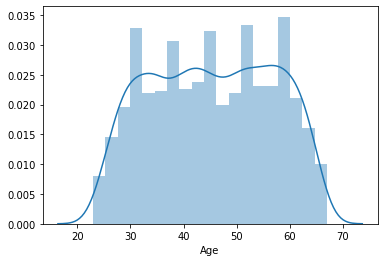

In [18]:
sns.distplot(data1['Age']);

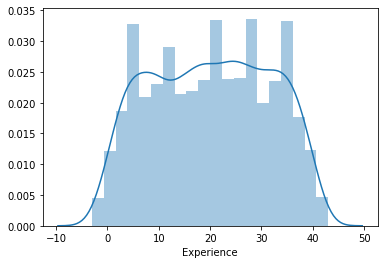

In [19]:
sns.distplot(data1['Experience']);

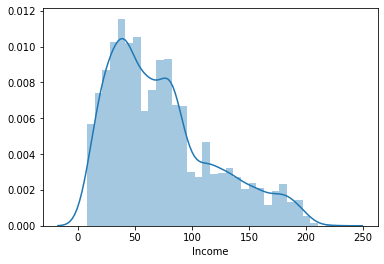

In [20]:
sns.distplot(data1['Income']);

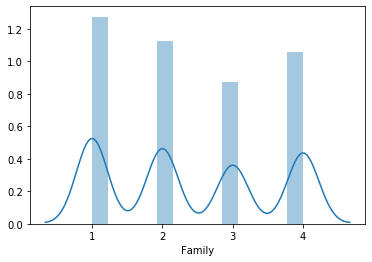

In [21]:
sns.distplot(data1['Family']);

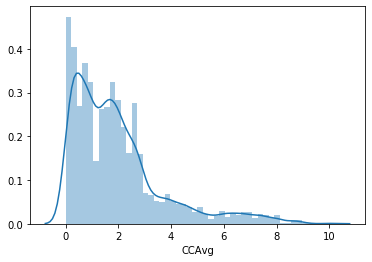

In [22]:
sns.distplot(data1['CCAvg']);

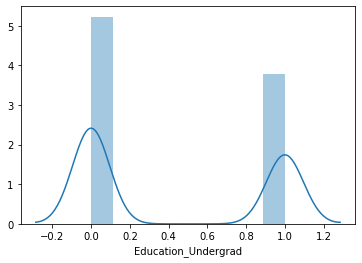

In [23]:
sns.distplot(data1['Education_Undergrad']);

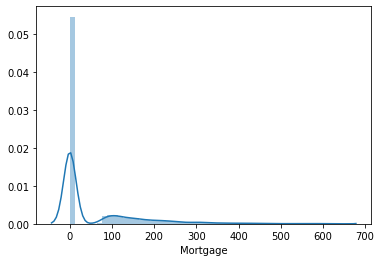

In [24]:
sns.distplot(data1['Mortgage']);

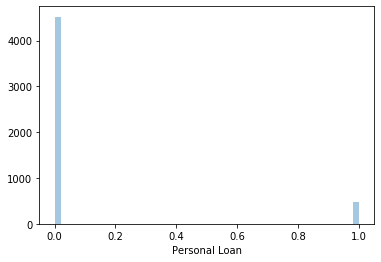

In [25]:
sns.distplot(data1['Personal Loan'],kde=False);

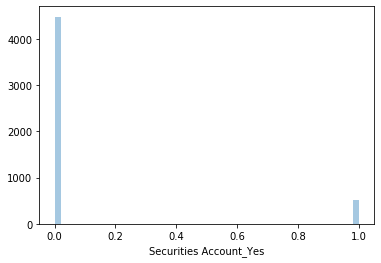

In [26]:
sns.distplot(data1['Securities Account_Yes'],kde=False);

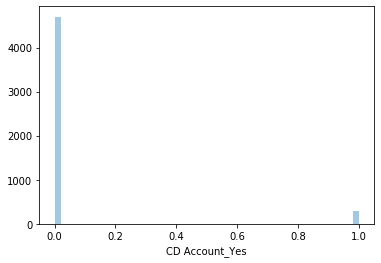

In [27]:
sns.distplot(data1['CD Account_Yes'],kde=False);

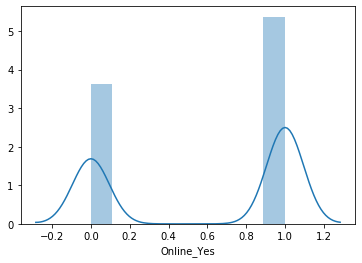

In [28]:
sns.distplot(data1['Online_Yes']);

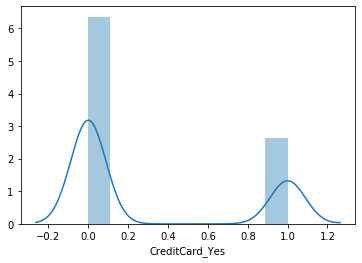

In [29]:
sns.distplot(data1['CreditCard_Yes']);

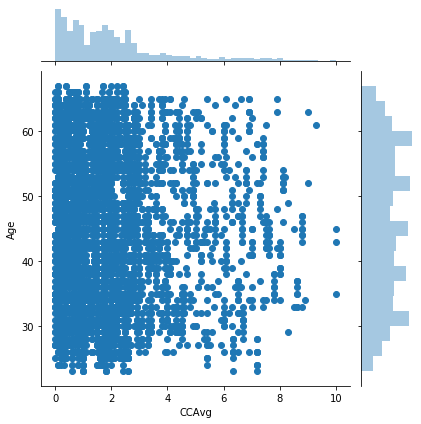

In [30]:
sns.jointplot(data1['CCAvg'],data1['Age'])

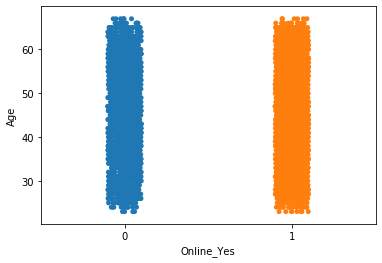

In [31]:
sns.stripplot(data1['Online_Yes'],data1['Age'],jitter=True)

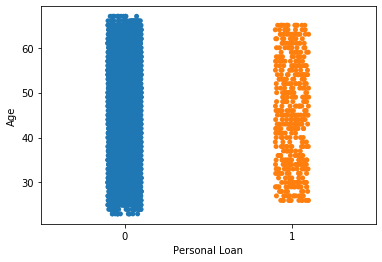

In [32]:
sns.stripplot(data1['Personal Loan'],data1['Age'],jitter=True)

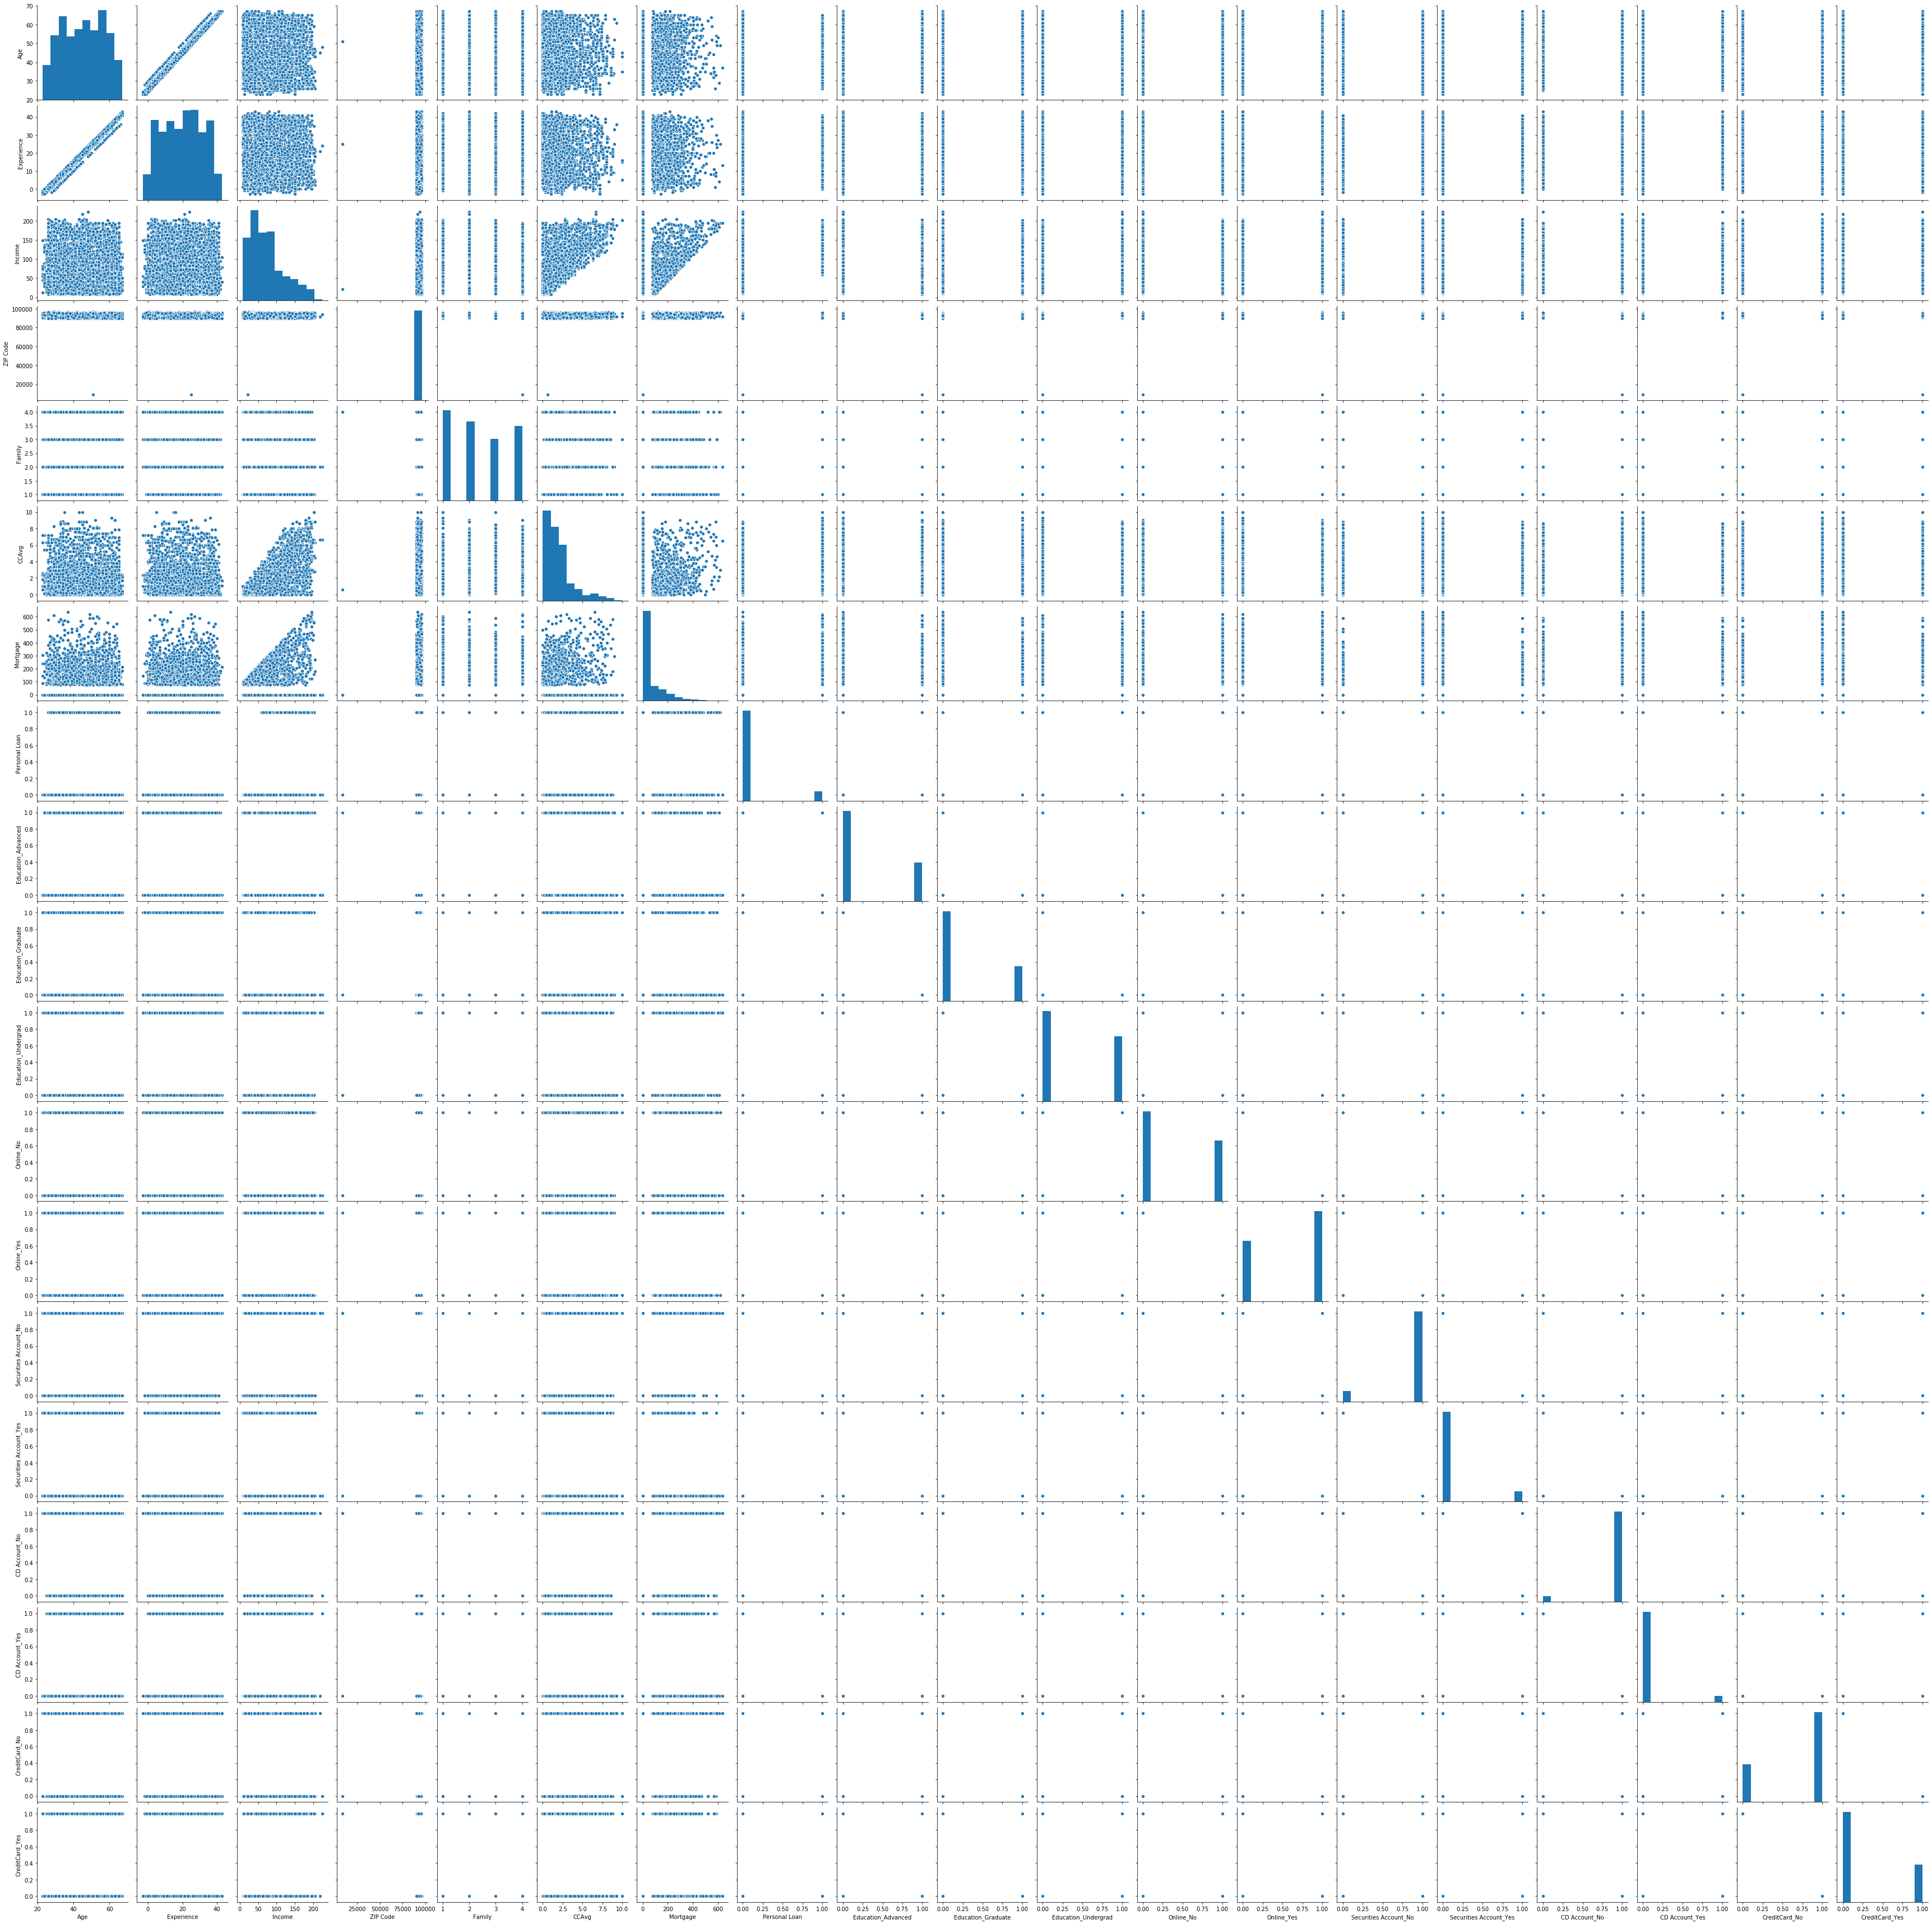

In [63]:
sns.pairplot(data1.iloc[:,1:]);

3.Split the data into training and test set in the ratio of 70:30 respectively (5marks)

In [34]:
X=data1.drop(['ID','Personal Loan','Education_Advanced','Online_No','Securities Account_No','CD Account_No','CreditCard_No'], axis=1)
y=data1['Personal Loan']
X.head(2)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Education_Graduate,Education_Undergrad,Online_Yes,Securities Account_Yes,CD Account_Yes,CreditCard_Yes
0,25,1,49,91107,4,1.6,0,0,1,0,1,0,0
1,45,19,34,90089,3,1.5,0,0,1,0,1,0,0


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [36]:
# check the data split
print("{0:0.2f}% data is in training set".format((len(X_train)/len(data1.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(data1.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [37]:
print (X_train.shape,y_train.shape)
print (X_test.shape,y_test.shape)

(3500, 13) (3500,)
(1500, 13) (1500,)


In [38]:
X.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Education_Graduate,Education_Undergrad,Online_Yes,Securities Account_Yes,CD Account_Yes,CreditCard_Yes
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,-0.012539,-0.016264,-0.027770,0.013702,-0.000436,0.008043,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,-0.010582,-0.018197,-0.002907,0.013898,-0.001232,0.010353,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,0.206806,-0.128364,0.218019,0.014206,-0.002616,0.169738,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,0.007383,0.037141,-0.002122,0.016990,0.004704,0.019972,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,-0.020445,0.139201,-0.118628,0.010354,0.019994,0.014110,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,0.109905,-0.090366,0.156979,-0.003611,0.015086,0.136534,-0.006689
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,1.000000,-0.031806,0.042841,-0.005995,-0.005411,0.089311,-0.007231
Education_Graduate,-0.016264,-0.018197,-0.128364,0.037141,0.139201,-0.090366,-0.031806,1.000000,-0.530586,0.020590,0.005134,0.006089,-0.012196
Education_Undergrad,-0.027770,-0.002907,0.218019,-0.002122,-0.118628,0.156979,0.042841,-0.530586,1.000000,0.003394,0.006863,-0.014630,0.014925
Online_Yes,0.013702,0.013898,0.014206,0.016990,0.010354,-0.003611,-0.005995,0.020590,0.003394,1.000000,0.012627,0.175880,0.004210


In [39]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

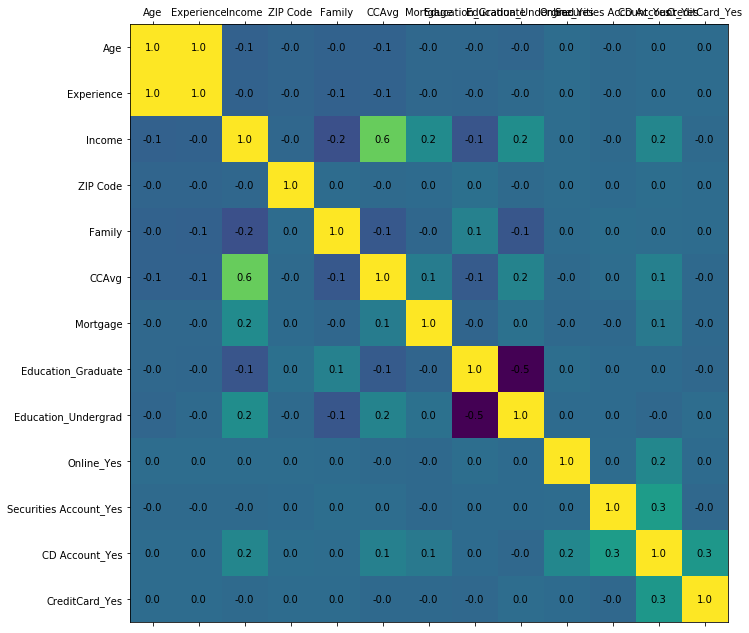

In [40]:
plot_corr(X)

We can see most of variables have no relation to other variables (Credit Card avergae spedning and Income has a postive 0.6 co-relation)

4.Use  Logistic  Regressionmodel  to  predict whether the customer will  take  personal  loan  or not. Print all the metrics related for evaluating the model performance (15marks)

check the personal loan acceptance in the previous campaign.

In [41]:
print("Original Personal Loan previous Acceptance  True Values    : {0} ({1:0.2f}%)".format(len(data1.loc[data1['Personal Loan'] == 1]), (len(data1.loc[data1['Personal Loan'] == 1])/len(data1.index)) * 100))
print("Original Personal Loan previous Acceptance False Values   : {0} ({1:0.2f}%)".format(len(data1.loc[data1['Personal Loan'] == 0]), (len(data1.loc[data1['Personal Loan'] == 0])/len(data1.index)) * 100))
print("")
print("Training Personal Loan previous Acceptance True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan previous AcceptanceFalse Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan previous Acceptance True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan previous Acceptance False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan previous Acceptance  True Values    : 480 (9.60%)
Original Personal Loan previous Acceptance False Values   : 4520 (90.40%)

Training Personal Loan previous Acceptance True Values    : 331 (9.46%)
Training Personal Loan previous AcceptanceFalse Values   : 3169 (90.54%)

Test Personal Loan previous Acceptance True Values        : 149 (9.93%)
Test Personal Loan previous Acceptance False Values       : 1351 (90.07%)



In [42]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
# Fit the model on traing data
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on testdata
y_predict = model.predict(X_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1        2         3         4         5         6  \
0 -0.000534 -0.002194  0.03602 -0.000065  0.016897  0.010414  0.000838   

          7         8         9        10        11        12  intercept  
0  0.006026 -0.012352 -0.000199  0.000595  0.005205 -0.000075  -0.000118  


In [43]:
model_score = model.score(X_test, y_test)
print(model_score)

0.9073333333333333


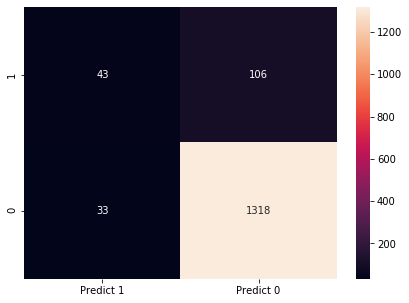

In [44]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')


The confusion matrix

True Positives (TP): we correctly predicted that they will take Personal Loan 43

True Negatives (TN): we correctly predicted that they won't take Personal Loan 1318

False Positives (FP): we incorrectly predicted that they will take Personal Loan (a "Type I error") 33 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they won't take Personal Loan (a "Type II error") 106 Falsely predict negative Type II error

Accuracy = (TP+TN)/population  = (43+1318)/(43+1318+33+106) = 0.907

Recall = TP/(TP+FN) (True Positive Rate)
Precision = TP/(TP+FP)   (Sensitivity)


In [45]:
Recall = 43/(43+106)
Recall

0.28859060402684567

In [46]:
Precision = (43/(43+33))
Precision

0.5657894736842105

In [47]:
F1Score = 2*Recall*Precision / (Recall+Precision)
F1Score

0.38222222222222224

5.Give your reasoning on how can the model perform better? (10 marks)Hint:Check parameter

In [ ]:
Out of all the coefficients, the 

In [49]:
logModel = LogisticRegression()
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [52]:
best_clf = clf.fit(X,y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 716 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 1156 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2616 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 3544 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 4660 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4777 out of 4800 | elapsed:  3.9min remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  4.0min finished
/Users/Anaconda/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Anaconda/anaconda3/lib/python3.7/site

In [54]:
best_clf.best_estimator_


LogisticRegression(C=78.47599703514607, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
print (f'Accuracy - : {best_clf.score(X,y):.3f}')

Accuracy - : 0.960


income variable influences more compared to other parameters from the initial coef value = 0.03602

6.Give Business understanding of your model? (5 marks)

Since the coef value of Income has more response to the increase in accuracy, targetting high income earners will increare the probability of accepting personal loan offer.